In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


In [7]:
# Load CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [9]:
# Add noise to the images
noise_factor = 0.5  # This factor controls the amount of noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to stay between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


In [11]:
# Define the input layer
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [13]:
# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 167ms/step - loss: 0.0266 - val_loss: 0.0135
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 162ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 156ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 160ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 162ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 159ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 162ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 12/50
391/391

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step


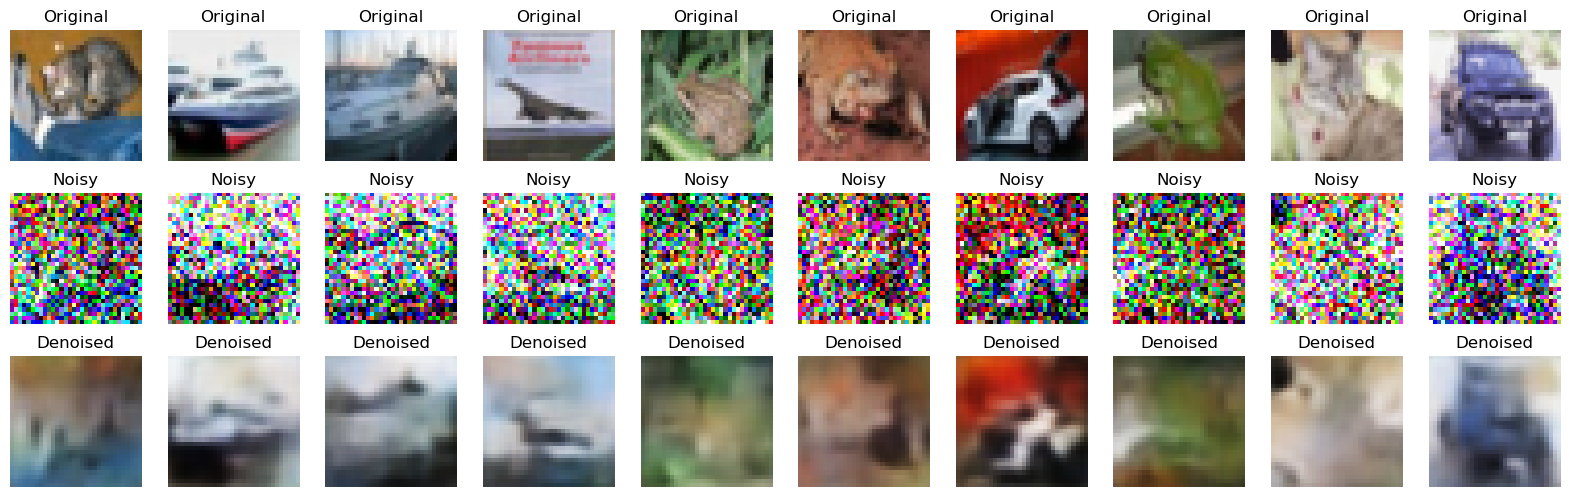

In [15]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
    
    # Display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")
    
    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.axis("off")
plt.show()
